
TFG

Este es el codigo del tfg de Borja Jimeno

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm
import re




plt.rcParams['font.size'] = 18

In [2]:
import uproot
file = uproot.open("results.root")
file.keys()

['gA112_6y_90_1.000000_6.000000_QFtamara_SI;1',
 'gA112_6y_90_1.000000_6.000000_QFtamara_SDproton;1',
 'gA112_6y_90_1.000000_6.000000_QFtamara_SDneutron;1',
 'gA112_6y_90_2.000000_6.000000_QFtamara_SDneutron;1',
 'gA112_6y_90_2.000000_6.000000_QFtamara_SDproton;1',
 'gA112_6y_90_2.000000_6.000000_QFtamara_SI;1',
 'gA112_6y_90_1.000000_2.000000_QFtamara_SI;1',
 'gA112_6y_90_1.000000_2.000000_QFtamara_SDproton;1',
 'gA112_6y_90_1.000000_2.000000_QFtamara_SDneutron;1',
 'gA112_6y_90_1.000000_3.000000_QFtamara_SDneutron;1',
 'gA112_6y_90_1.000000_3.000000_QFtamara_SDproton;1',
 'gA112_6y_90_1.000000_3.000000_QFtamara_SI;1']

In [3]:
file["gA112_6y_90_1.000000_3.000000_QFtamara_SI;1"].all_members

{'@fUniqueID': 0,
 '@fBits': 50332672,
 'fName': 'Graph',
 'fTitle': 'Graph',
 'fLineColor': 1,
 'fLineStyle': 1,
 'fLineWidth': 1,
 'fFillColor': 0,
 'fFillStyle': 1000,
 'fMarkerColor': 1,
 'fMarkerStyle': 1,
 'fMarkerSize': 1.0,
 'fNpoints': 144,
 'fX': array([3.000e+00, 3.750e+00, 4.500e+00, 5.250e+00, 4.000e+00, 5.000e+00,
        6.000e+00, 7.000e+00, 5.000e+00, 6.250e+00, 7.500e+00, 8.750e+00,
        6.000e+00, 7.500e+00, 9.000e+00, 1.050e+01, 7.000e+00, 8.750e+00,
        1.050e+01, 1.225e+01, 8.000e+00, 1.000e+01, 1.200e+01, 1.400e+01,
        9.000e+00, 1.125e+01, 1.350e+01, 1.575e+01, 1.000e+01, 1.250e+01,
        1.500e+01, 1.750e+01, 2.000e+01, 2.500e+01, 3.000e+01, 3.500e+01,
        3.000e+01, 3.750e+01, 4.500e+01, 5.250e+01, 4.000e+01, 5.000e+01,
        6.000e+01, 7.000e+01, 5.000e+01, 6.250e+01, 7.500e+01, 8.750e+01,
        6.000e+01, 7.500e+01, 9.000e+01, 1.050e+02, 7.000e+01, 8.750e+01,
        1.050e+02, 1.225e+02, 8.000e+01, 1.000e+02, 1.200e+02, 1.400e+02,
    

In [4]:
import numpy as np


def carga_datos_hist(titulo):
    file = uproot.open("results.root")
    file.keys()
    longitud=36*4
    datos=np.zeros((6,longitud))
    i=0
    for a in ("SI","SDproton","SDneutron"):
        graph = file[titulo+a]
        datos[2*i]=graph.member("fX")
        datos[2*i+1]=graph.member("fY")
        i=i+1
    return datos
     

Datos16=carga_datos_hist("gA112_6y_90_1.000000_6.000000_QFtamara_")
Datos26=carga_datos_hist("gA112_6y_90_2.000000_6.000000_QFtamara_")
Datos12=carga_datos_hist("gA112_6y_90_1.000000_2.000000_QFtamara_")
Datos13=carga_datos_hist("gA112_6y_90_1.000000_3.000000_QFtamara_")

for i in range (3):
    idx = np.argsort(Datos16[2*i])
    Datos16[2*i+1]= Datos16[2*i+1][idx]
    Datos26[2*i+1]= Datos26[2*i+1][idx]
    Datos12[2*i+1]= Datos12[2*i+1][idx]
    Datos13[2*i+1]= Datos13[2*i+1][idx]
    Datos16[2*i]= Datos16[2*i][idx]
    Datos26[2*i]= Datos26[2*i][idx]
    Datos12[2*i]= Datos12[2*i][idx]
    Datos13[2*i]= Datos13[2*i][idx]




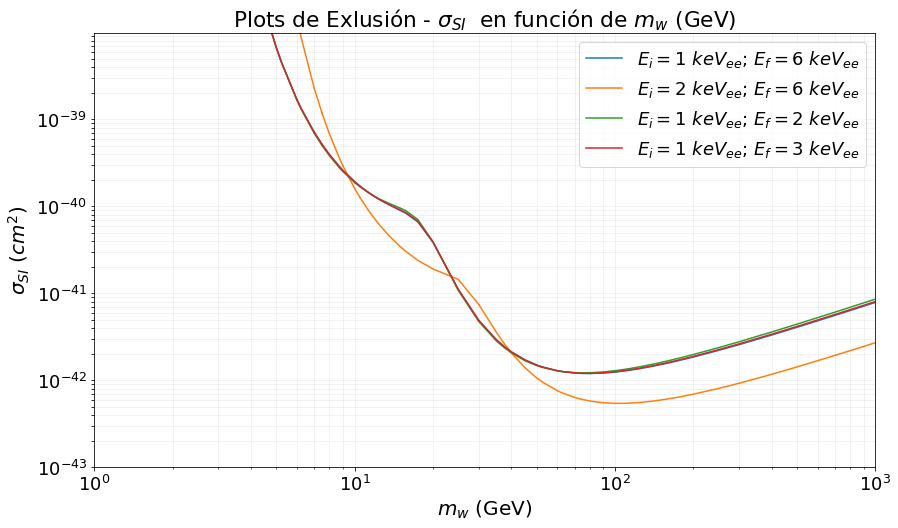

In [5]:

plt.figure(figsize=(14, 8))
ax = plt.subplot()

ax.plot(Datos16[0],Datos16[1],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos26[0],Datos26[1],label="$E_i=$"+f"{2}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos12[0],Datos12[1],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{2}"+" $keV_{ee}$")
ax.plot(Datos13[0],Datos13[1],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{3}"+" $keV_{ee}$")



ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SI}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-38
y_inf=1e-43

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)



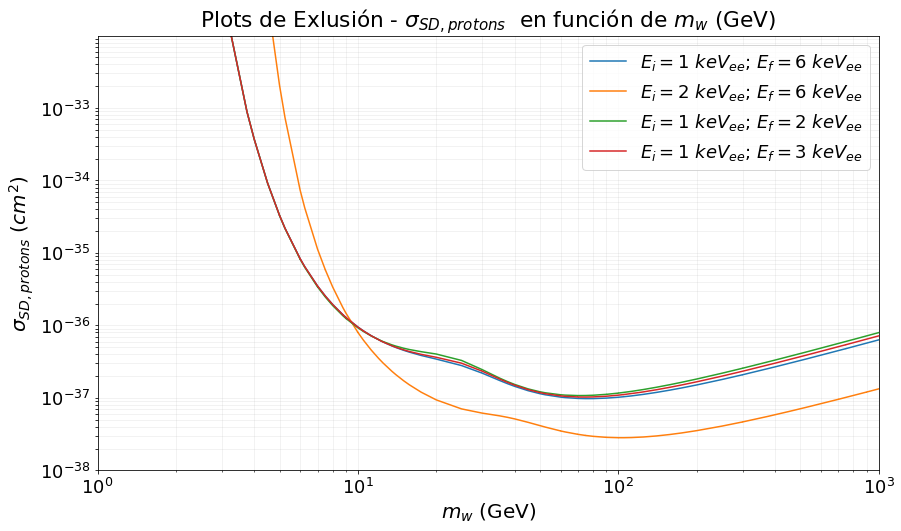

In [6]:

plt.figure(figsize=(14, 8))
ax = plt.subplot()

ax.plot(Datos16[2],Datos16[3],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos26[2],Datos26[3],label="$E_i=$"+f"{2}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos12[2],Datos12[3],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{2}"+" $keV_{ee}$")
ax.plot(Datos13[2],Datos13[3],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{3}"+" $keV_{ee}$")



ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SD,protons}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SD,protons}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-32
y_inf=1e-38

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)


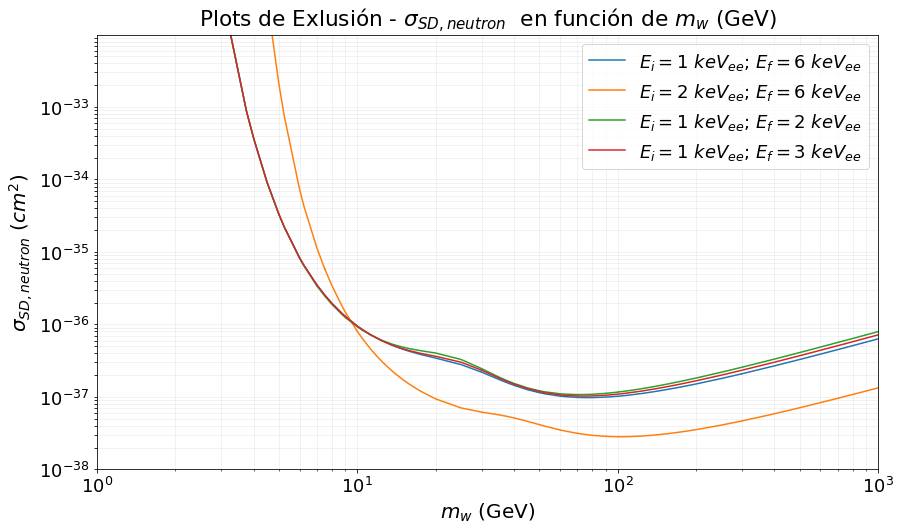

In [7]:

plt.figure(figsize=(14, 8))
ax = plt.subplot()



ax.plot(Datos16[4],Datos16[5],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos26[4],Datos26[5],label="$E_i=$"+f"{2}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos12[4],Datos12[5],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{2}"+" $keV_{ee}$")
ax.plot(Datos13[4],Datos13[5],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{3}"+" $keV_{ee}$")

ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SD,neutron}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SD,neutron}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-32
y_inf=1e-38

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)

sigma16=Datos16[5]
masas16=Datos16[4]

sigma26=Datos26[5]
masas26=Datos26[4]
m=masas16
s=sigma16

fichero = open("SD_N_ANAIS_16.txt", 'w')
# Guardamos la lista en el fichero
for i in range(len(m)):
    fichero.write(f"{m[i]} \t {s[i]} \n")

# Cerramos el fichero
fichero.close()

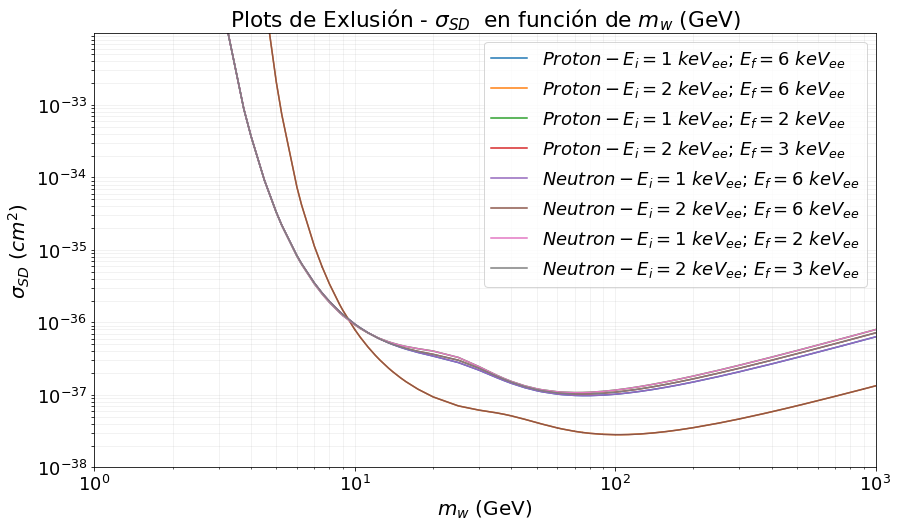

In [8]:

plt.figure(figsize=(14, 8))
ax = plt.subplot()

ax.plot(Datos16[2],Datos16[3],label="$Proton - E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos26[2],Datos26[3],label="$Proton - E_i=$"+f"{2}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos12[2],Datos12[3],label="$Proton - E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{2}"+" $keV_{ee}$")
ax.plot(Datos13[2],Datos13[3],label="$Proton - E_i=$"+f"{2}"+" $keV_{ee}$; $E_f=$"+f"{3}"+" $keV_{ee}$")

ax.plot(Datos16[4],Datos16[5],label="$Neutron - E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos26[4],Datos26[5],label="$Neutron - E_i=$"+f"{2}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos12[4],Datos12[5],label="$Neutron - E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{2}"+" $keV_{ee}$")
ax.plot(Datos13[4],Datos13[5],label="$Neutron - E_i=$"+f"{2}"+" $keV_{ee}$; $E_f=$"+f"{3}"+" $keV_{ee}$")

ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SD}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SD}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-32
y_inf=1e-38

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)

# Creamos el archivo para la macro con el intervalo deseado

In [9]:
einf=1
esup=6
window=1
step=0.5

modes=[0,1,2]

list_names=[]

i=einf
while i<esup:
    j=i+window
    while j<=esup:
        for k in modes:
            if(i%1!=0 or j%1!=0):
                list_names.append("./fitSimulMakeExclusion 90 "+f'{float(i):.1f}' + " " + f'{float(j):.1f}'+ " " + str(k))
        j=j+step
    i=i+step



            


print(list_names)

fichero = open("datos_guardados.txt", 'w')
# Guardamos la lista en el fichero
for linea in list_names:
    fichero.write(linea + "\n")

# Cerramos el fichero
fichero.close()


['./fitSimulMakeExclusion 90 1.0 2.5 0', './fitSimulMakeExclusion 90 1.0 2.5 1', './fitSimulMakeExclusion 90 1.0 2.5 2', './fitSimulMakeExclusion 90 1.0 3.5 0', './fitSimulMakeExclusion 90 1.0 3.5 1', './fitSimulMakeExclusion 90 1.0 3.5 2', './fitSimulMakeExclusion 90 1.0 4.5 0', './fitSimulMakeExclusion 90 1.0 4.5 1', './fitSimulMakeExclusion 90 1.0 4.5 2', './fitSimulMakeExclusion 90 1.0 5.5 0', './fitSimulMakeExclusion 90 1.0 5.5 1', './fitSimulMakeExclusion 90 1.0 5.5 2', './fitSimulMakeExclusion 90 1.5 2.5 0', './fitSimulMakeExclusion 90 1.5 2.5 1', './fitSimulMakeExclusion 90 1.5 2.5 2', './fitSimulMakeExclusion 90 1.5 3.0 0', './fitSimulMakeExclusion 90 1.5 3.0 1', './fitSimulMakeExclusion 90 1.5 3.0 2', './fitSimulMakeExclusion 90 1.5 3.5 0', './fitSimulMakeExclusion 90 1.5 3.5 1', './fitSimulMakeExclusion 90 1.5 3.5 2', './fitSimulMakeExclusion 90 1.5 4.0 0', './fitSimulMakeExclusion 90 1.5 4.0 1', './fitSimulMakeExclusion 90 1.5 4.0 2', './fitSimulMakeExclusion 90 1.5 4.5 0',

# Creamos las funciones para trabajar con cadenas que nos serviran para leer los datos

In [10]:
def encuentra_intervalo(cadena):
    valores = re.findall(r"\d+\.\d+", cadena)
    a=np.zeros(2)
    a[0]=float(valores[0])
    a[1]=float(valores[1])
    return a

def lista_intervalo_fijo(einf,esup,window,step,modes):

    list_names=[]

    prin1="gA112_6y_90_"
    prin2="_QFtamara_"

    list_modes=["SI","SDproton","SDneutron"]

    i=einf
    while i<esup:
        j=i+window
        if j<=esup:
            for k in modes:
                list_names.append(prin1+f'{float(i):.6f}'+"_"+f'{float(j):.6f}'+prin2+list_modes[k])
        i=i+step
    return(list_names)

def lista_intervalo_movil(einf,esup,window,step,modes):
    list_names=[]

    prin1="gA112_6y_90_"
    prin2="_QFtamara_"

    list_modes=["SI","SDproton","SDneutron"]

    i=einf
    while i<esup:
        j=i+window
        while j<=esup:
            for k in modes:
                list_names.append(prin1+f'{float(i):.6f}'+"_"+f'{float(j):.6f}'+prin2+list_modes[k])
            j=j+step
        i=i+step
    return(list_names)

def carga_datos_hist(lista):
    
    file1 = uproot.open("results_0.5.root")
    file2 = uproot.open("results3.root")
    
    longitud=144
    datos=[]
    intervalos=[]
    resultado=[]

    for nombre in lista:

        valores=encuentra_intervalo(nombre)
        
        if(valores[0]%1!=0 or valores[1]%1!=0):
            graph = file1[nombre]
        else:
            graph = file2[nombre]
        aux=np.zeros((2,longitud))
        aux[0]=graph.member("fX")
        aux[1]=graph.member("fY")
        datos.append(aux)
        intervalos.append(valores)
    
        
        
        #np.savetxt("Exposicion_exp.csv",datos)  
    resultado.append(datos)
    resultado.append(intervalos)
    return resultado

def minimiza_lista_datos(lista_datos):
    
    longitud=144
    masas=np.zeros(longitud)
    sigmas=np.zeros(longitud)
    intervalo_minimo=np.zeros((2,longitud))

    for i in range (len(masas)):
        masas[i]=lista_datos[0][0][0][i]

    for i in range (len(masas)):
        sigma_aux=1
        for j in range (len(lista_datos[0])):
            a=0
            for k in range (len(masas)):
                if(lista_datos[0][j][1][k]<1.e-60):
                    a=1
            if (a==0):
                if(lista_datos[0][j][1][i]<sigma_aux):
                    if(lista_datos[0][j][1][i]>1.e-50):
                        sigma_aux=lista_datos[0][j][1][i]
                        intervalo_minimo[0,i]=lista_datos[1][j][0]
                        intervalo_minimo[1,i]=lista_datos[1][j][1]
        sigmas[i]=sigma_aux

    return masas,sigmas,intervalo_minimo


# SI Intervalo fijo de 1 keV

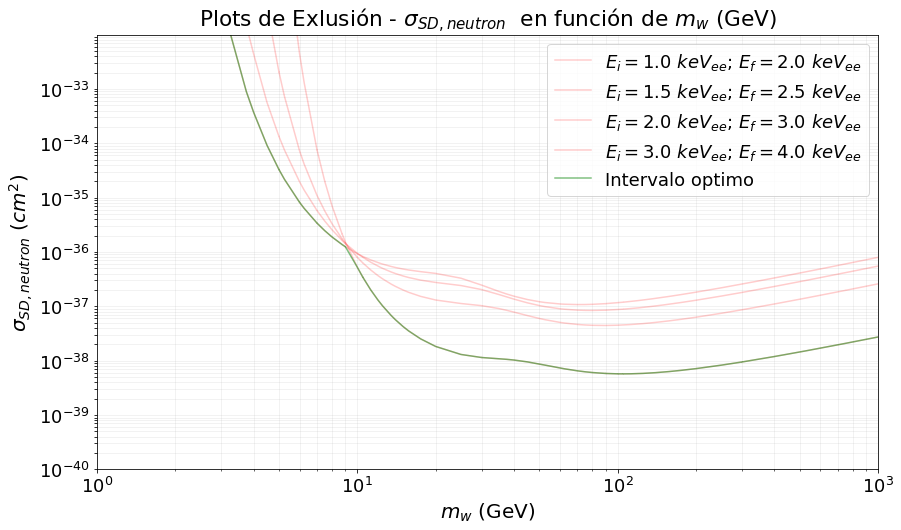

In [11]:
einf=1.0
esup=6.0
window=1.0
step=0.5
modes=[2]

lista_datos=carga_datos_hist(lista_intervalo_fijo(einf,esup,window,step,modes))

masas,sigmas,intervalo_minimo=minimiza_lista_datos(lista_datos)

idx = np.argsort(masas)
masas= masas[idx]
sigmas = sigmas[idx]

plt.figure(figsize=(14, 8))
ax = plt.subplot()

for j in range (len(lista_datos[0])):
    a=0
    for i in range (len(masas)):
        if(lista_datos[0][j][1][i]<1.e-60):
            a=1
    if (a==0):
        Ei = float(lista_datos[1][j][0])
        Ef = float(lista_datos[1][j][1])
        idx = np.argsort(lista_datos[0][j][0])
        m= lista_datos[0][j][0][idx]
        s = lista_datos[0][j][1][idx]
        ax.plot(m,s,c="red",alpha=0.2,label=("$E_i=$" + f"{Ei:.1f}" + " $keV_{ee}$; ""$E_f=$" + f"{Ef:.1f}" + " $keV_{ee}$"),antialiased=True,
        solid_joinstyle='round')

ax.plot(masas,sigmas,label="Intervalo optimo",alpha=0.5,c='green', antialiased=True,
    solid_joinstyle='round')


ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SD,neutron}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SD,neutron}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-32
y_inf=1e-40

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)

sigma_fijo_1kev=sigmas




# SI Intervalo fijo de 2 keV

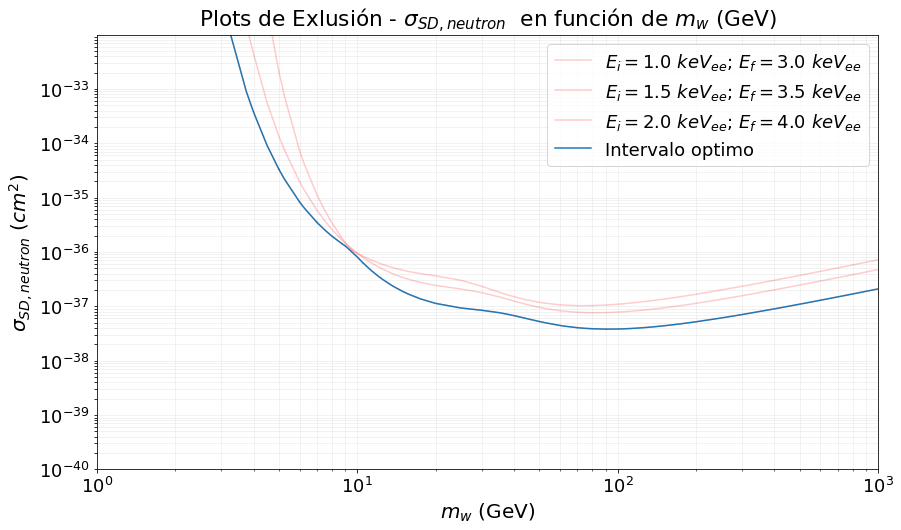

In [12]:
einf=1.0
esup=6.0
window=2.0
step=0.5
modes=[2]

lista_datos=carga_datos_hist(lista_intervalo_fijo(einf,esup,window,step,modes))

masas,sigmas,intervalo_minimo=minimiza_lista_datos(lista_datos)
idx = np.argsort(masas)
masas= masas[idx]
sigmas = sigmas[idx]

plt.figure(figsize=(14, 8))
ax = plt.subplot()

for j in range (len(lista_datos[0])):
    a=0
    for i in range (len(masas)):
        if(lista_datos[0][j][1][i]<1.e-60):
            a=1
    if (a==0):
        Ei = float(lista_datos[1][j][0])
        Ef = float(lista_datos[1][j][1])
        idx = np.argsort(lista_datos[0][j][0])
        m= lista_datos[0][j][0][idx]
        s = lista_datos[0][j][1][idx]
        ax.plot(m,s,c="red",alpha=0.2,label=("$E_i=$" + f"{Ei:.1f}" + " $keV_{ee}$; ""$E_f=$" + f"{Ef:.1f}" + " $keV_{ee}$"),antialiased=True,
        solid_joinstyle='round')

ax.plot(masas,sigmas,label="Intervalo optimo")


ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SD,neutron}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SD,neutron}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-32
y_inf=1e-40

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)

sigma_fijo_2kev=sigmas


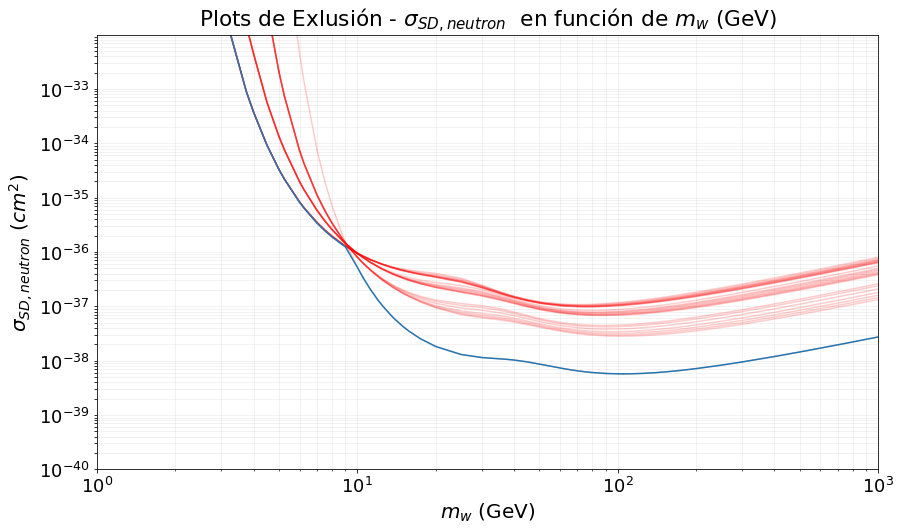

In [13]:
einf=1.0
esup=6.0
window=1.0
step=0.5
modes=[2]

lista_datos=carga_datos_hist(lista_intervalo_movil(einf,esup,window,step,modes))

masas,sigmas,intervalo_minimo=minimiza_lista_datos(lista_datos)
idx = np.argsort(masas)
masas= masas[idx]
sigmas = sigmas[idx]

plt.figure(figsize=(14, 8))
ax = plt.subplot()

for j in range (len(lista_datos[0])):
    a=0
    for i in range (len(masas)):
        if(lista_datos[0][j][1][i]<1.e-60):
            a=1
    if (a==0):
        Ei = float(lista_datos[1][j][0])
        Ef = float(lista_datos[1][j][1])
        idx = np.argsort(lista_datos[0][j][0])
        m= lista_datos[0][j][0][idx]
        s = lista_datos[0][j][1][idx]
        ax.plot(m,s,c="red",alpha=0.2,label=("$E_i=$" + f"{Ei:.1f}" + " $keV_{ee}$; ""$E_f=$" + f"{Ef:.1f}" + " $keV_{ee}$"),antialiased=True,
        solid_joinstyle='round')

ax.plot(masas,sigmas,label="Intervalo optimo")


#ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SD,neutron}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SD,neutron}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-32
y_inf=1e-40

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)

sigma_variable_1keV=sigmas
ancho_1kev=intervalo_minimo


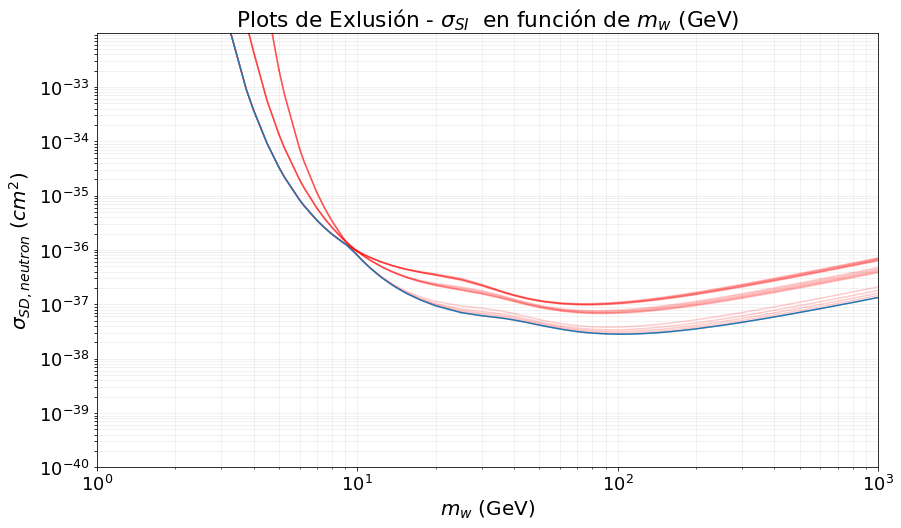

In [14]:
einf=1.0
esup=6.0
window=2.0
step=0.5
modes=[2]

lista_datos=carga_datos_hist(lista_intervalo_movil(einf,esup,window,step,modes))

masas,sigmas,intervalo_minimo=minimiza_lista_datos(lista_datos)
idx = np.argsort(masas)
masas= masas[idx]
sigmas = sigmas[idx]

plt.figure(figsize=(14, 8))
ax = plt.subplot()

for j in range (len(lista_datos[0])):
    a=0
    for i in range (len(masas)):
        if(lista_datos[0][j][1][i]<1.e-60):
            a=1
    if (a==0):
        Ei = float(lista_datos[1][j][0])
        Ef = float(lista_datos[1][j][1])
        idx = np.argsort(lista_datos[0][j][0])
        m= lista_datos[0][j][0][idx]
        s = lista_datos[0][j][1][idx]
        ax.plot(m,s,c="red",alpha=0.2,label=("$E_i=$" + f"{Ei:.1f}" + " $keV_{ee}$; ""$E_f=$" + f"{Ef:.1f}" + " $keV_{ee}$"),antialiased=True,
        solid_joinstyle='round')

ax.plot(masas,sigmas,label="Intervalo optimo")


#ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SI}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SD,neutron}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-32
y_inf=1e-40

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)

sigma_variable_2keV=sigmas
ancho_2kev=intervalo_minimo




Intervalo minimo 1 keV
Mass: 3.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 3.8 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 4.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 4.5 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 5.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 5.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 5.2 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 6.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 6.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 6.2 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 7.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 7.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 7.5 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 7.5 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 8.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 8.8 GeV - Minimum Exlussion Interval:  (3

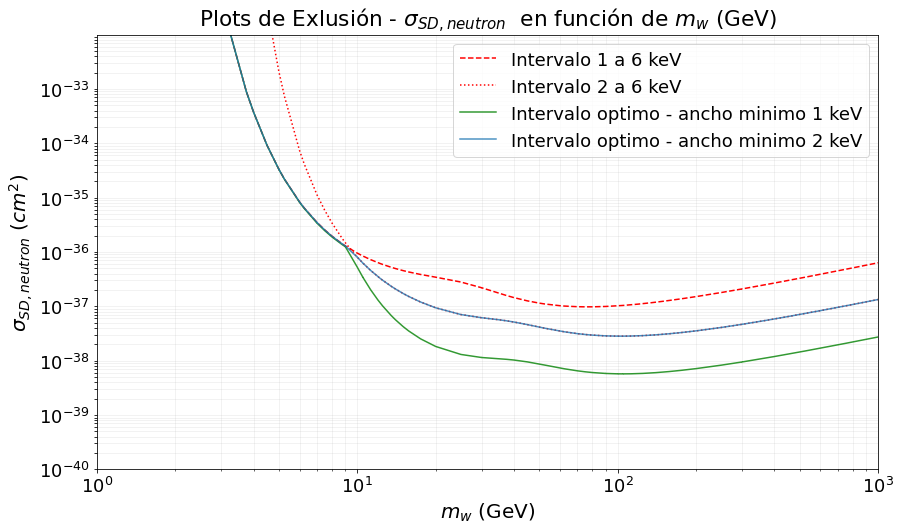

In [15]:
plt.figure(figsize=(14, 8))
ax = plt.subplot()


ax.plot(masas16,sigma16,c='red',linestyle='--',label="Intervalo 1 a 6 keV")
ax.plot(masas26,sigma26,c='red',linestyle=':',label="Intervalo 2 a 6 keV")
ax.plot(masas,sigma_variable_1keV,c='green',alpha = 0.8,label="Intervalo optimo - ancho minimo 1 keV")
ax.plot(masas,sigma_variable_2keV,alpha = 0.8,label="Intervalo optimo - ancho minimo 2 keV")

ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SD,neutron}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SD,neutron}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-32
y_inf=1e-40

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)


print(f'Intervalo minimo 1 keV') 
for i in range (len(masas)):
    print(f'Mass: {masas[i]:.1f} GeV - Minimum Exlussion Interval:  ({ancho_1kev[0][i]} - {ancho_1kev[1][i]}) keV ')
print(f'Intervalo minimo 2 keV') 
for i in range (len(masas)):
    print(f'Mass: {masas[i]:.1f} GeV - Minimum Exlussion Interval:  ({ancho_2kev[0][i]} - {ancho_2kev[1][i]}) keV ')

In [16]:
m=masas
s=sigma_variable_1keV

fichero = open("SD_N_ANAIS_INT.txt", 'w')
# Guardamos la lista en el fichero
for i in range(len(m)):
    fichero.write(f"{m[i]} \t {s[i]} \n")

# Cerramos el fichero
fichero.close()